# **Inflation** -

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn import preprocessing
from sklearn import utils

import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv


### **Consumer Price Indices** (CPI) measure changes over time in general level of prices of goods and services that households acquire for the purpose of consumption. CPI numbers are widely used as a macroeconomic indicator of inflation, as a tool by governments and central banks for inflation targeting and for monitoring price stability, and as deflators in the national accounts.


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/All_India_Index_july2019_20Aug2020.csv')
df.head(20)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
8,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,100.4,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5
9,Rural,2013,April,110.2,109.5,106.9,106.3,105.7,108.3,103.4,...,NaN,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4


### Data Exploration

In [ ]:
df=df.drop('Month',axis=1)
df = df.fillna(99)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               267 non-null    object 
 1   Year                                 267 non-null    int64  
 2   Cereals and products                 267 non-null    float64
 3   Meat and fish                        267 non-null    float64
 4   Egg                                  267 non-null    float64
 5   Milk and products                    267 non-null    float64
 6   Oils and fats                        267 non-null    float64
 7   Fruits                               267 non-null    float64
 8   Vegetables                           267 non-null    float64
 9   Pulses and products                  267 non-null    float64
 10  Sugar and Confectionery              267 non-null    float64
 11  Spices                          

In [ ]:
df1=df.loc[df['Sector'] == 'Rural']
df2=df.loc[df['Sector'] == 'Urban']


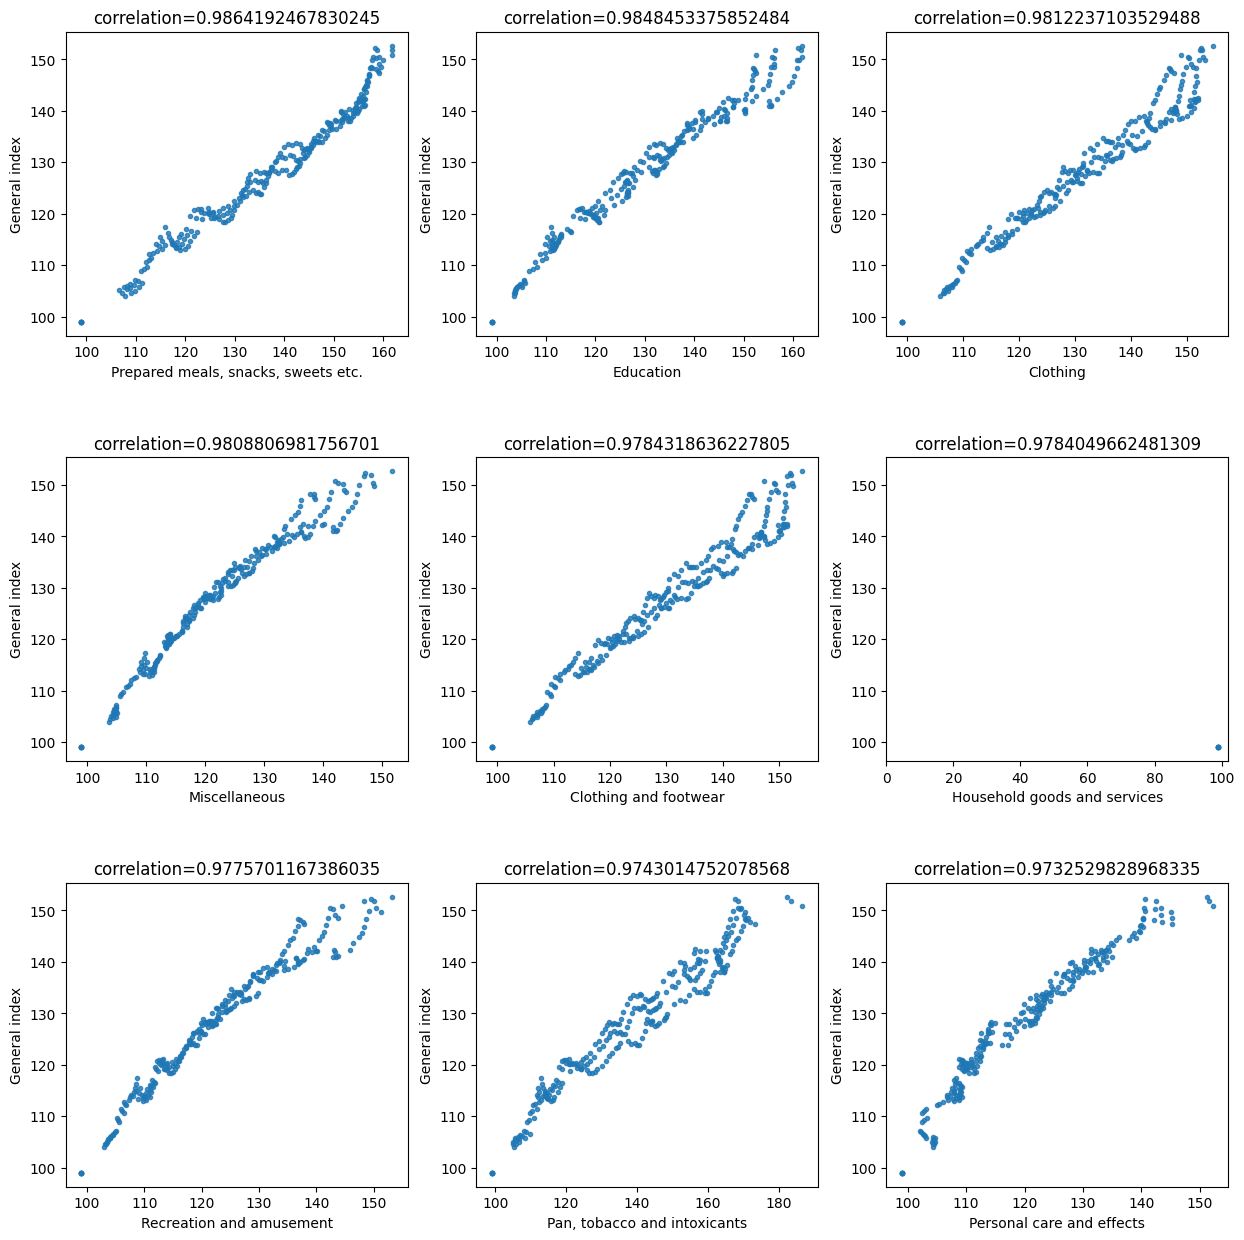

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if (col!='General index'):
        corr_to_gdp[col] = df['General index'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='General index', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

<ipython-input-10-7f31b74ccc8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu",linecolor='black', annot=True)


<Axes: >

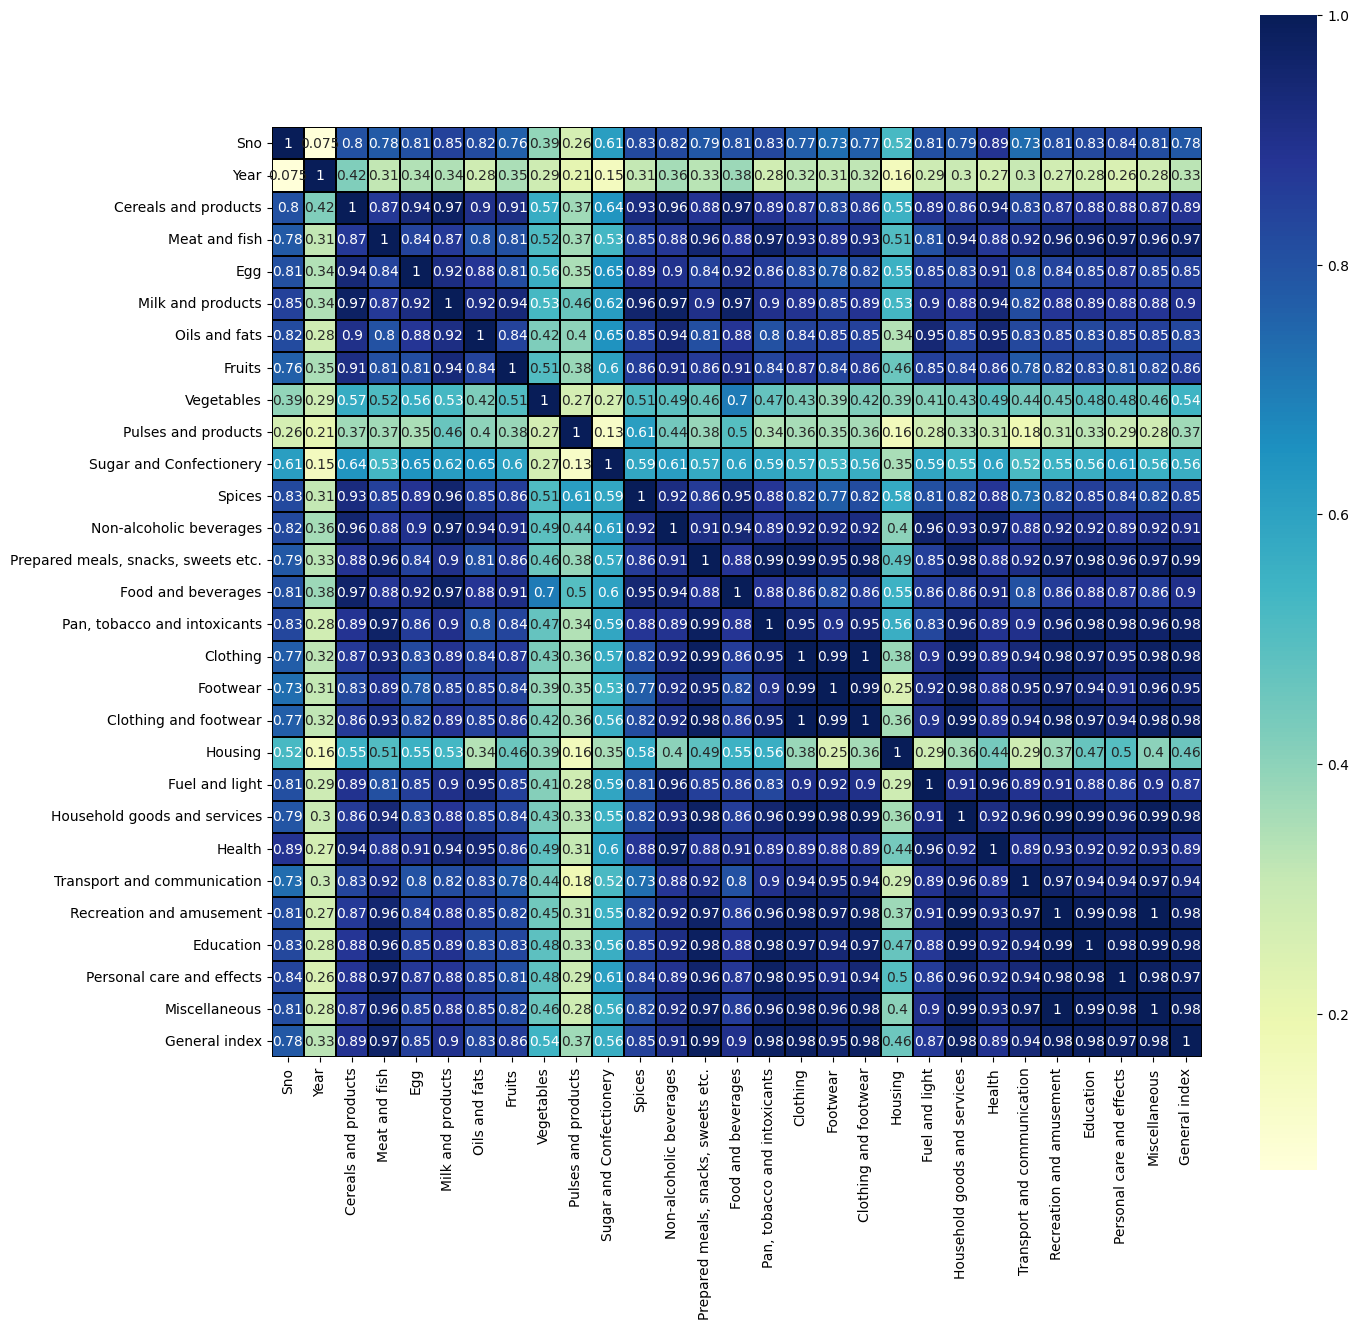

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu",linecolor='black', annot=True)

In [ ]:
a=['Food and beverages','Clothing and footwear','Sugar and Confectionery','Health','Transport and communication','Education']


### Model Building

In [ ]:
lab = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
X = df[a] # Independet variable
y = df['General index'] # dependent variable
y = lab.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
p=lin_reg.predict(X_test)
lin_reg.score(X_test, y_test)


0.9889744425963743

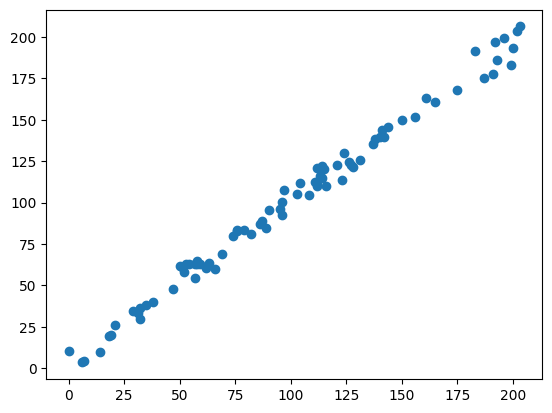

In [ ]:
plt.scatter(y_test,p)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = DecisionTreeRegressor()
knn.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
p=knn.predict(X_test)
knn.score(X_test, y_test)

0.9901594839046735

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
p=rf.predict(X_test)
rf.score(X_test, y_test)

0.9957088494208854

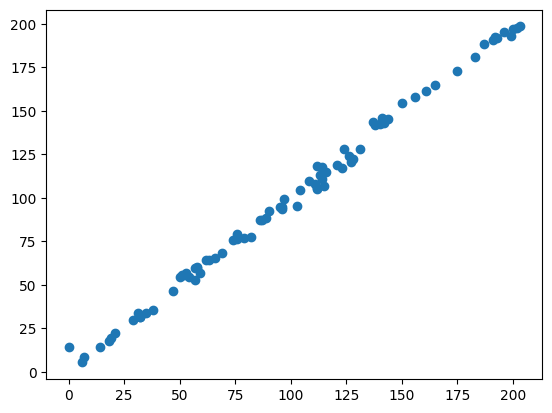

In [ ]:
plt.scatter(y_test,p)
